# Dijkstra's Algorithm

In [1]:
def dijkstra_algo(vertices, edges, distances, source):
    """
    Dijkstra algorithm computes the minimum distance of each vertex in the graph from the source 
    vertex. Rum time of this naive implementation is O(m+n).
    # TODO: Use heap operations to reduce run time O(m logn)
    
    :param vertices: A list containing the integers indicating vertices
    :param edges: A list containing the head and tail of each edge
    :param distances: A list containing the distance of each edge
    :param source: An integer representing the source vertex
    :return: a dictionary containting the minimum distance of each vertex from the source vertex
    """
    # Initiate a dictionary and add distance to source vertex as 0
    answer = {source: 0}
    # Run the while loop untill all vertices are added to the 'answer' dictionary
    while len(answer) != len(vertices):
        min_dist, min_vert = float('inf'), -float('inf')
        for ij in range(len(edges)):
            # Find the corss edges, head in answer dictionary and tail is not
            if edges[ij][0] in answer and edges[ij][1] not in answer:
                # Compute the minimum distance (Dijkstra Greedy Criterion)
                tmp_dist = answer[edges[ij][0]] + distances[ij]
                # Update minimum distance and vertex
                if tmp_dist < min_dist:
                    min_vert = edges[ij][1]
                    min_dist = tmp_dist
        answer[min_vert] = min_dist
    return answer

## Example 1

Consider the following direct graph with 11 vertices and edge distance as shown in the figure.

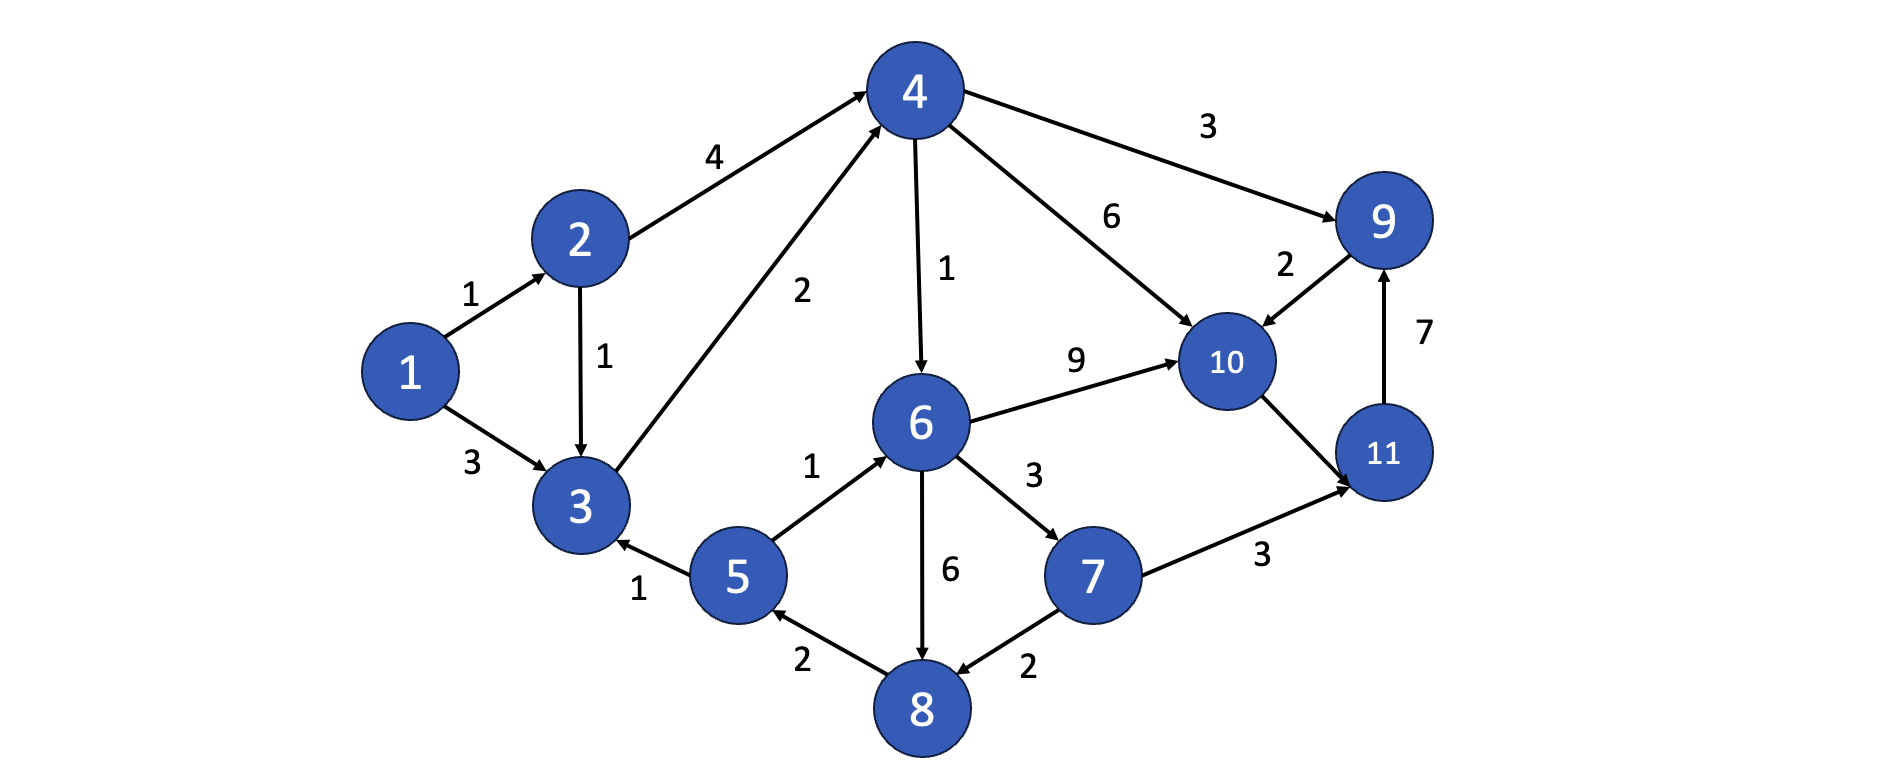

The vertices, edges and distance are defined by the following variables.

In [2]:
vert_ = [xy+1 for xy in range(11)]
edges = [[1, 2], [1, 3], [2, 3], [2, 4], [3, 4], [4, 6], [4, 9], [4, 10], [5, 3], [5, 6], [6, 7], [6, 8], [6, 10],
         [7, 8], [7, 11], [8, 5], [9, 10], [10, 11], [11, 9]]
distance = [1, 3, 1, 4, 2, 1, 3, 6, 1, 1, 3, 6, 9, 2, 3, 2, 2, 4, 7]

Compute the minimum distance of each vertex from the vertex 1 using Dijkstra's algorithm.

In [3]:
shortest_dist = dijkstra_algo(vert_, edges, distance, 1)
print('Minimum distance from vertex 1:', shortest_dist)

Minimum distance from vertex 1: {1: 0, 2: 1, 3: 2, 4: 4, 6: 5, 9: 7, 7: 8, 10: 9, 8: 10, 11: 11, 5: 12}


## Example 2

Read input from the "dijkstra.txt" file

In [4]:
my_file = open("dijkstra.txt", "r")
data = my_file.read().split("\n")[:-1]
adjacency_matrix = [xy.split('\t')[:-1] for xy in data]

Create two list, first containing the end vertices of each edge in the data and second containing the distance of each edge.

In [5]:
edges, distance = list(), list()
for vertex_i in adjacency_matrix:
    for j in range(1, len(vertex_i)):
        edges.append([int(vertex_i[0]), int(vertex_i[j].split(',')[0])])
        distance.append(int(vertex_i[j].split(',')[1]))
vert_ = [xy+1 for xy in range(len(adjacency_matrix))]

Compute the minimum distance of each vertex from the vertex 1 using Dijkstra's algorithm.

In [6]:
shortest_dist = dijkstra_algo(vert_, edges, distance, 1)

The first 10 closest vertex to source vertex 1 are printed below.

In [7]:
sort_list = sorted(shortest_dist.values())[:11]
print('Vertex: Distance')
for x in shortest_dist:
    if shortest_dist[x] in sort_list:
        print('{:03d}:    {}'.format(x, shortest_dist[x]))

Vertex: Distance
001:    0
114:    508
140:    546
092:    647
145:    648
129:    676
070:    743
009:    745
199:    815
065:    826
080:    982
